In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample

In [10]:
# Load the dataset
df = pd.read_csv(r'D:\Program\Sentiment Analysis\training model\Updated_Twitter_Dataset.csv')

In [11]:
# Check class distribution
print(df['Target'].value_counts())

Target
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64


In [12]:
# Handle imbalanced dataset
# Separate the classes
df_negative = df[df['Target'] == -1]
df_neutral = df[df['Target'] == 0]
df_positive = df[df['Target'] == 1]

In [13]:
# Upsample minority classes
df_negative_upsampled = resample(df_negative, 
                                 replace=True,    # sample with replacement
                                 n_samples=72250, # match to majority class
                                 random_state=42) 

df_neutral_upsampled = resample(df_neutral, 
                                replace=True,    # sample with replacement
                                n_samples=72250, # match to majority class
                                random_state=42)

In [14]:
# Combine the upsampled data with the majority class
df_upsampled = pd.concat([df_positive, df_neutral_upsampled, df_negative_upsampled])

print(df_upsampled['Target'].value_counts())

Target
 1.0    72250
 0.0    72250
-1.0    72250
Name: count, dtype: int64


In [16]:
# Handle missing values
df_upsampled['comments'].fillna('', inplace=True)

In [17]:
# Preprocess the text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_upsampled['comments'])
y = df_upsampled['Target']

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [20]:
# Test the model
y_pred = model.predict(X_test)

In [21]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12514   671  1434]
 [ 2059 10577  1755]
 [ 2469  1057 10814]]
              precision    recall  f1-score   support

        -1.0       0.73      0.86      0.79     14619
         0.0       0.86      0.73      0.79     14391
         1.0       0.77      0.75      0.76     14340

    accuracy                           0.78     43350
   macro avg       0.79      0.78      0.78     43350
weighted avg       0.79      0.78      0.78     43350



In [22]:
import joblib

# Save the model
joblib.dump(model, 'naive_bayes_model.pkl')

# Save the vectorizer
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [23]:
# Load the model
model = joblib.load('naive_bayes_model.pkl')

# Load the vectorizer
vectorizer = joblib.load('vectorizer.pkl')

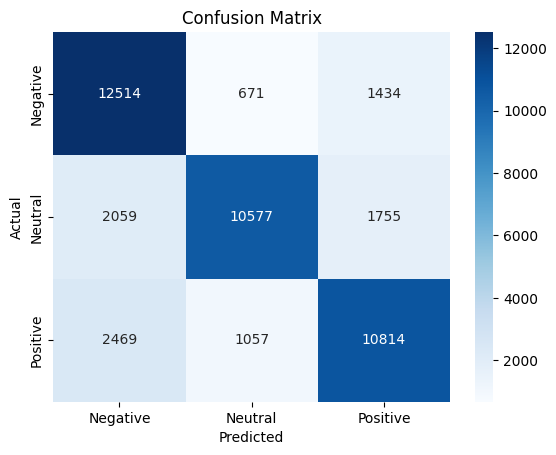

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X = tfidf_vectorizer.fit_transform(df_upsampled['comments'])

In [28]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [30]:
# Test the model
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12743   562  1314]
 [ 2471  9965  1955]
 [ 2804   962 10574]]
              precision    recall  f1-score   support

        -1.0       0.71      0.87      0.78     14619
         0.0       0.87      0.69      0.77     14391
         1.0       0.76      0.74      0.75     14340

    accuracy                           0.77     43350
   macro avg       0.78      0.77      0.77     43350
weighted avg       0.78      0.77      0.77     43350

